In [1]:
from matplotlib import pyplot as plt
import json
from datetime import datetime
import matplotlib.dates as mdates

In [2]:
with open("crashes-output.json", "r") as f:
    data = json.load(f)

In [3]:
join_timestamps = []
for d in data:
    join_timestamps.append(d["timestamp"])

In [4]:
join_timestamps.sort()

In [5]:
lines = "clusterID"
data_routes = {}
for d in data:
    if data_routes.get(d[lines]) is None:
        data_routes.update({d[lines]: []})
    data_routes[d[lines]].append(d)

In [6]:
routes_timestamps = {}
for d in data_routes:
    if routes_timestamps.get(d) is None:
        routes_timestamps.update({d: {}})
    for single_data in range(len(data_routes[d])):
        routes_timestamps[d].update(
            {
                data_routes[d][single_data]["timestamp"]: {
                    "index": single_data,
                    "data": data_routes[d][single_data]["data"]          
                }
            })

In [7]:
routes_timestamps_f = {}
for route in data_routes:
    # print(route)
    routes_timestamps_f.update({route: []})
    for timestamp in join_timestamps:
        if routes_timestamps[route].get(timestamp) is not None:
            routes_timestamps_f[route].append(
                routes_timestamps[route][timestamp]["data"])
        else:
            routes_timestamps_f[route].append(0)

# print(routes_timestamps_f)

In [8]:
join_timestamps_readable = [datetime.fromtimestamp(i//1000) for i in join_timestamps]

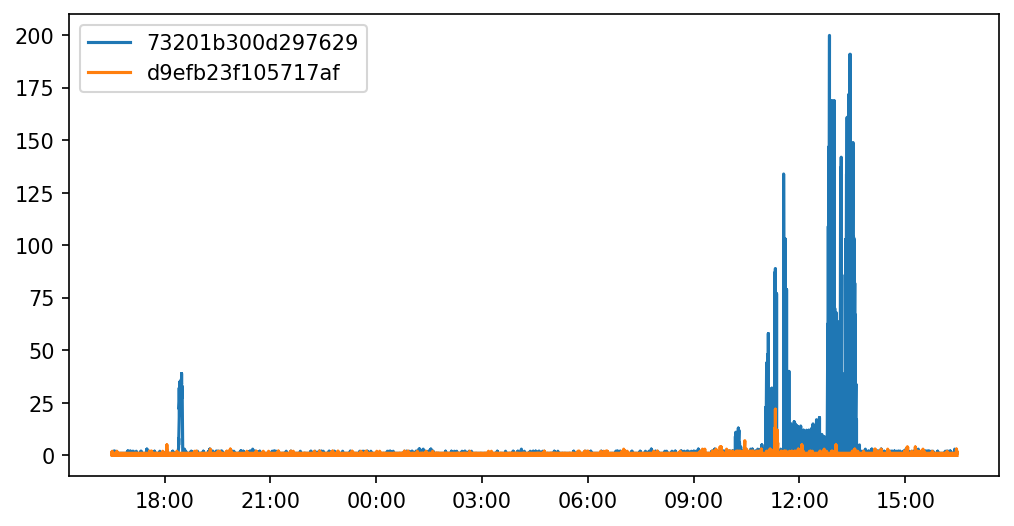

In [10]:
plt.figure(figsize=(8,4), dpi=150)
# formatting = '%d.%m %H:%M'
formatting = '%H:%M'
date_format = mdates.DateFormatter(formatting)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# print(x)
x = join_timestamps_readable
for route in routes_timestamps:
    plt.plot(x, routes_timestamps_f[route])

    
plt.legend(routes_timestamps)
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()